In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
model = models.Sequential()

In [3]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

In [4]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras import optimizers

In [8]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_dir = 'train'
test_dir = 'test'
val_dir = "validation"

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
validation_dir = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [17]:
train_generator.class_indices


{'mask': 0, 'not_mask': 1}

In [18]:
history = model.fit_generator(
train_generator,
steps_per_epoch=20,
epochs=10,
validation_data=validation_dir,
validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 230s 12s/step - loss: 0.4464 - acc: 0.8000 - val_loss: 0.1458 - val_acc: 1.0000
Epoch 2/10
20/20 [==============================] - 148s 7s/step - loss: 0.0767 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 3/10
20/20 [==============================] - 146s 7s/step - loss: 0.0265 - acc: 0.9975 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 4/10
20/20 [==============================] - 131s 7s/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 5/10
20/20 [==============================] - 129s 6s/step - loss: 0.0357 - acc: 0.9850 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 6/10
20/20 [==============================] - 137s 7s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 9.5356e-04 - val_acc: 1.0000
Epoch 7/10
20/20 [==============================] - 138s 7s/step - loss: 0.0010 - acc: 1.0000 - val_loss: 6.6809e-04 - val_acc: 1.000

In [19]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 399 images belonging to 2 classes.


In [20]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.9969939589500427


In [21]:
model.save('mask_not_mask_model.h5')

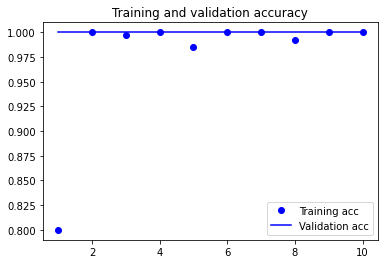

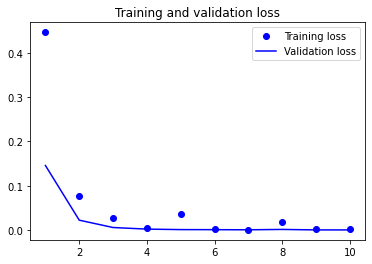

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()